### Optional
This is for word-wrapping the output of OCR process

In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### Setup

In [2]:
!pip install --no-deps -q bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 39.9 MB/s eta 0:00:00


In [3]:
!pip install addict transformers==4.46.3 tokenizers==0.20.3 pdf2image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 125.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [4]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 1s (218 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126718 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!mkdir -p /content/outputs /content/pdf_pages/

### PDF to Images

In [6]:
from pdf2image import convert_from_path

pdf_file = '/content/all_refined.pdf'
images = convert_from_path(pdf_file)

for i, image in enumerate(images):
    image.save(f'/content/pdf_pages/page_{i+1}.jpg', 'JPEG')

In [7]:
number_of_pages = len(images)
print(f'Number of pages: {number_of_pages}')

Number of pages: 119


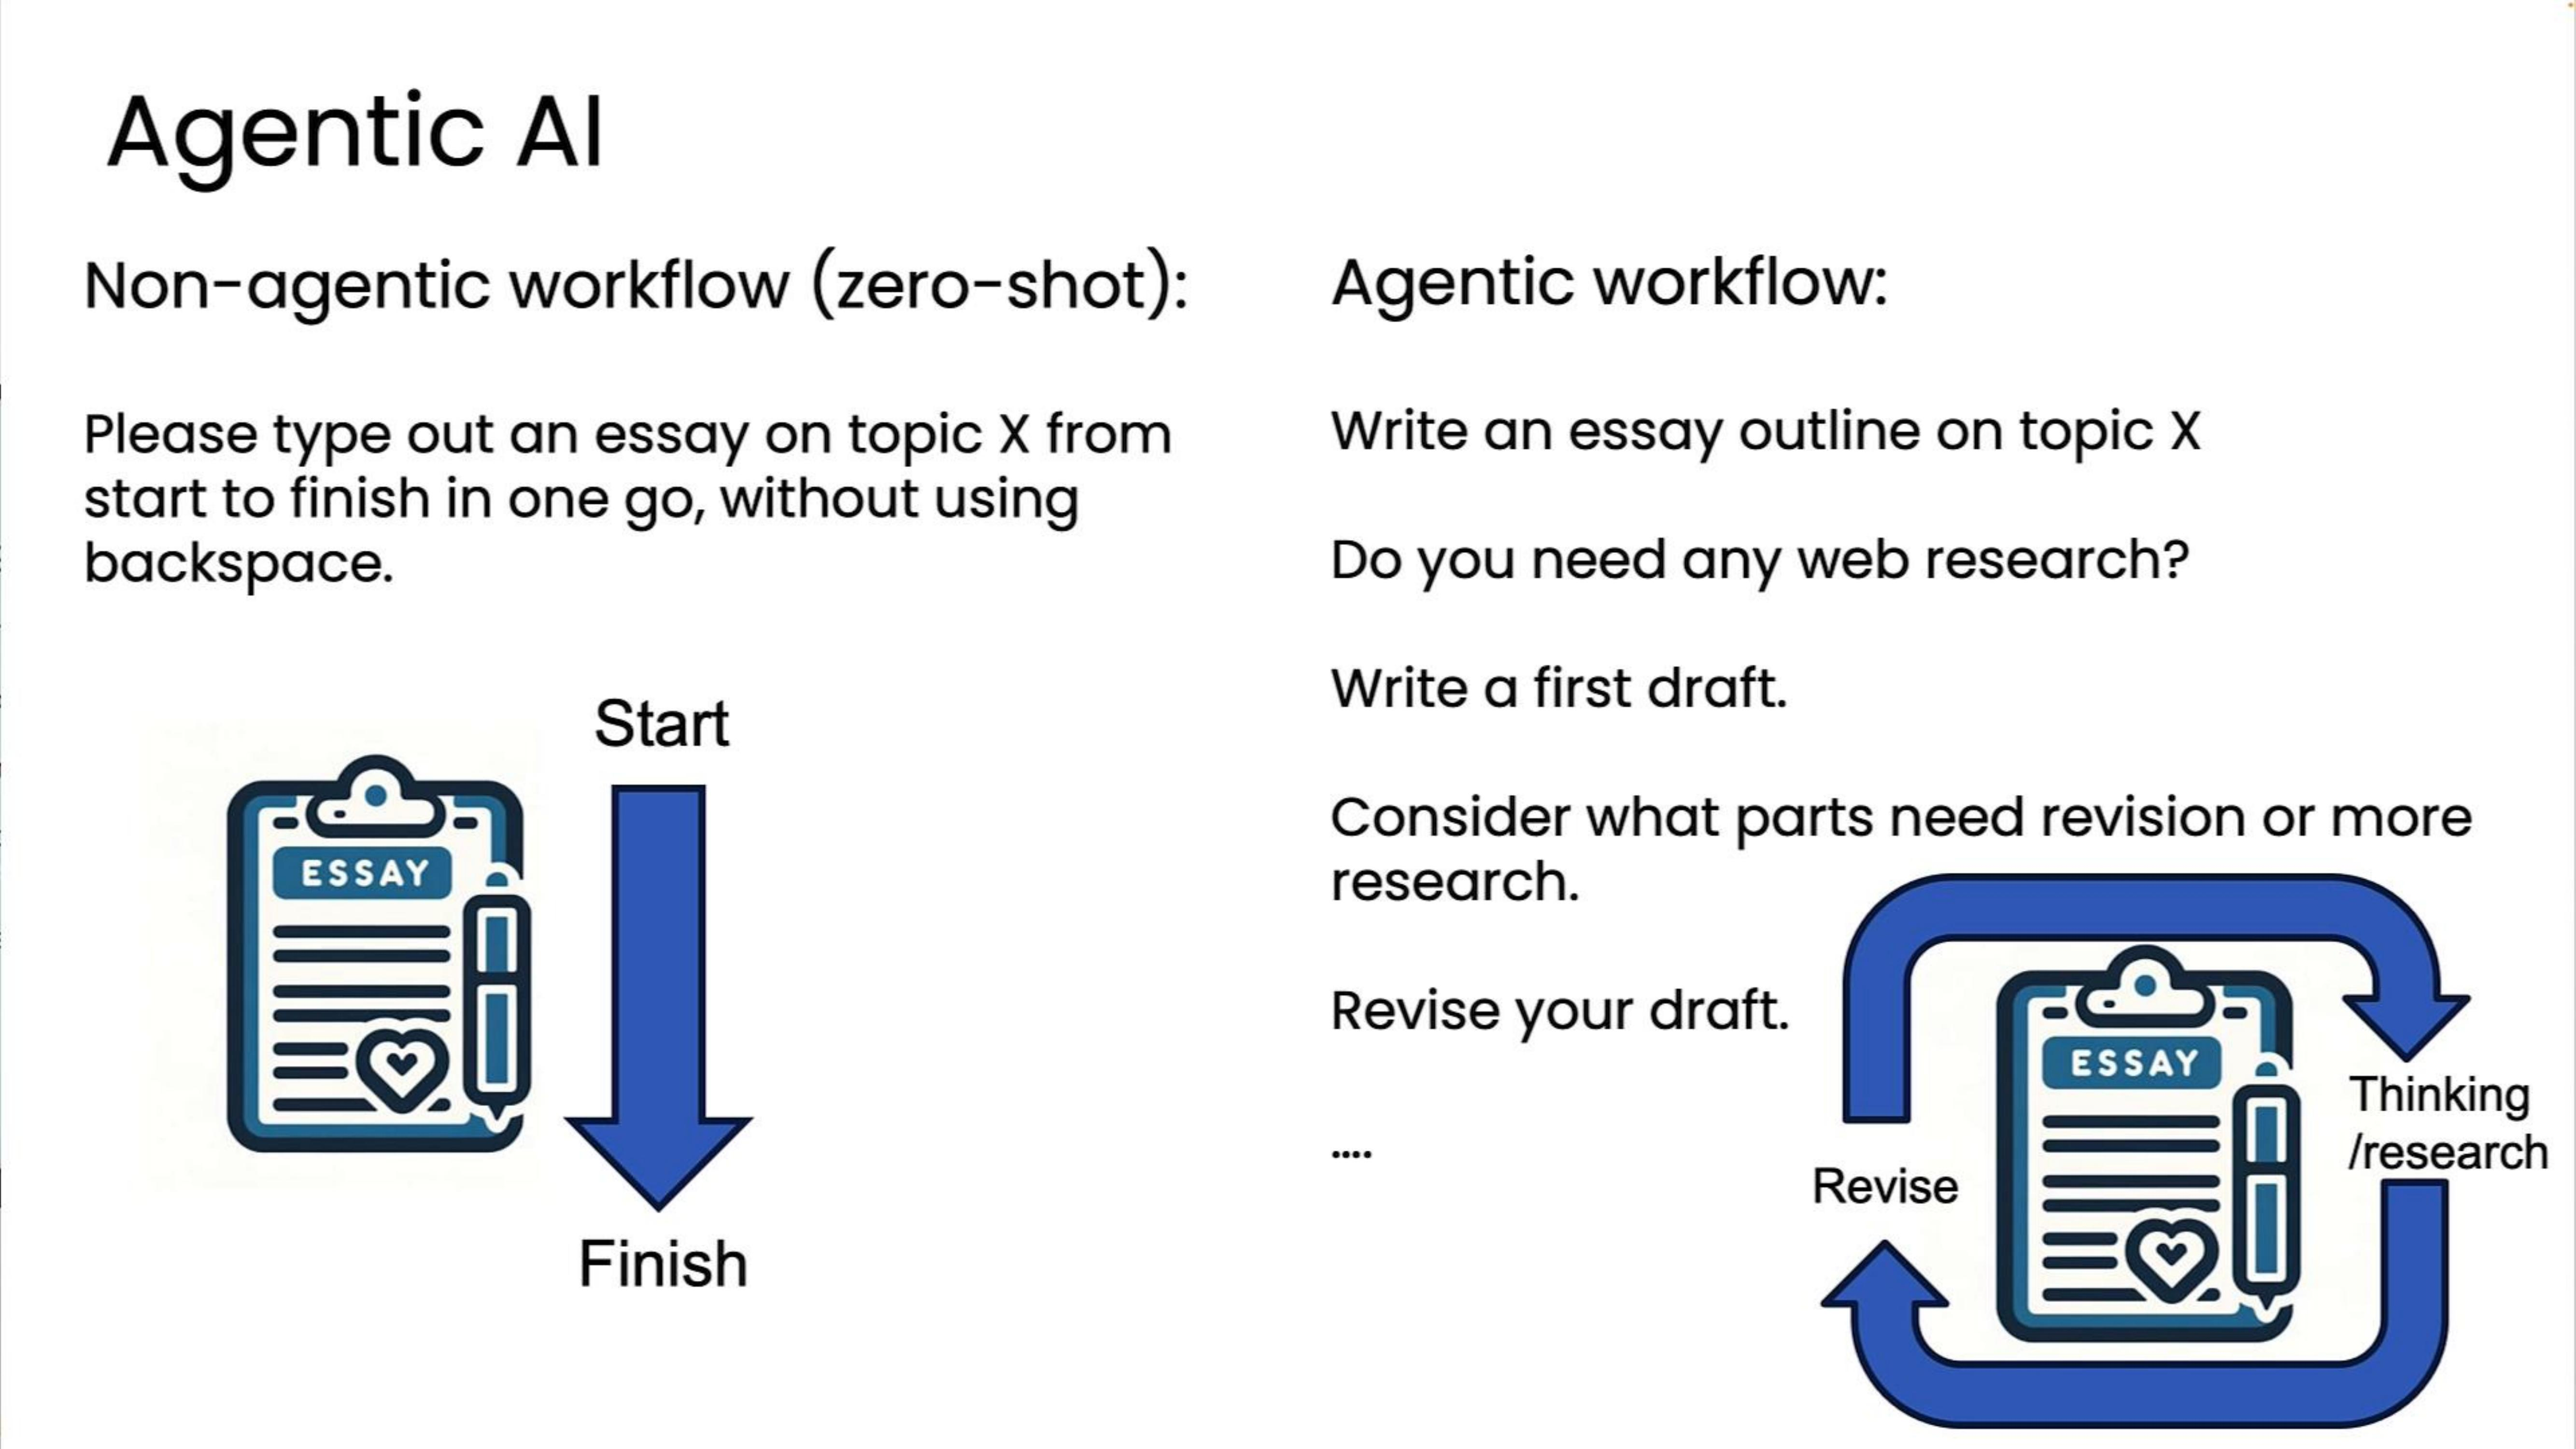

In [8]:
from IPython.display import Image as _I
_I("/content/pdf_pages/page_1.jpg", width=640)

### OCR

In [9]:
from transformers import AutoModel, AutoTokenizer, BitsAndBytesConfig
import torch

model_name = 'deepseek-ai/DeepSeek-OCR'

In [10]:
qc = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float
)

In [11]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name, trust_remote_code=True,
    use_safetensors=True, device_map="auto",
    quantization_config=qc, torch_dtype=torch.float
)
model = model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


deepencoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekv2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekocr.py
- configuration_deepseek_v2.py
- conversation.py
- deepencoder.py
- modeling_deepseekv2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
prompt = "<image>\n<|grounding|>Convert the document to markdown."

In [23]:
import os
import re
import json
from io import StringIO
import sys
from PIL import Image

# ===============================================
# تابع استخراج bbox با محتوا (اصلاح شده)
# ===============================================

def extract_bboxes_with_content(text):
    """استخراج bbox همراه با محتوای واقعی متن"""
    bboxes = []

    # ابتدا تمیزسازی می‌کنیم
    lines = text.split('\n')
    cleaned_lines = []

    skip_patterns = [
        '====', 'BASE:', 'PATCHES:', 'NO PATCHES', 'torch.Size',
        'image size:', 'valid image tokens:', 'output texts tokens',
        'compression ratio:', 'UserWarning', 'attention mask', 'pad_token_id'
    ]

    for line in lines:
        if not any(pattern in line for pattern in skip_patterns):
            cleaned_lines.append(line)

    cleaned_text = '\n'.join(cleaned_lines)

    # حالا pattern matching
    # فرمت: <|ref|>type<|/ref|><|det|>[[...]]<|/det|> و بعدش محتوا تا ref بعدی
    pattern = r'<\|ref\|>(.*?)<\|/ref\|><\|det\|>(\[\[.*?\]\])<\|/det\|>\s*\n?(.*?)(?=<\|ref\||$)'

    matches = re.finditer(pattern, cleaned_text, re.DOTALL)

    for match in matches:
        element_type = match.group(1).strip()
        bbox_str = match.group(2)
        raw_content = match.group(3).strip() if match.group(3) else ""

        # پاکسازی محتوا - حذف خطوط خالی اضافی
        content_lines = [line.strip() for line in raw_content.split('\n') if line.strip()]
        content = '\n'.join(content_lines)

        try:
            bbox_data = json.loads(bbox_str)

            if isinstance(bbox_data[0], list):
                if isinstance(bbox_data[0][0], list):
                    for single_bbox in bbox_data:
                        bboxes.append({
                            'type': element_type,
                            'bbox': single_bbox,
                            'normalized': True,
                            'content': content
                        })
                else:
                    bboxes.append({
                        'type': element_type,
                        'bbox': bbox_data[0],
                        'normalized': True,
                        'content': content
                    })
            else:
                bboxes.append({
                    'type': element_type,
                    'bbox': bbox_data,
                    'normalized': True,
                    'content': content
                })
        except Exception as e:
            print(f"   ⚠️  خطا در پارس: {element_type} | {e}")

    return bboxes

def extract_tables_from_markdown(markdown_file):
    """استخراج جداول از فایل markdown"""
    if not os.path.exists(markdown_file):
        return []

    with open(markdown_file, 'r', encoding='utf-8') as f:
        content = f.read()

    tables = []
    lines = content.split('\n')

    i = 0
    while i < len(lines):
        line = lines[i]

        # تشخیص جدول (خط با | | |)
        if '|' in line and line.strip().startswith('|'):
            table_lines = [line]
            i += 1

            # جمع‌آوری خطوط جدول
            while i < len(lines) and '|' in lines[i]:
                table_lines.append(lines[i])
                i += 1

            # ساخت جدول
            table_text = '\n'.join(table_lines)
            tables.append({
                'type': 'table',
                'content': table_text,
                'row_count': len(table_lines),
                'is_markdown_table': True
            })
        else:
            i += 1

    return tables

def calculate_bbox_details(bbox, image_width, image_height):
    """محاسبه جزئیات bbox"""
    x1_px = int((bbox[0] / 999.0) * image_width)
    y1_px = int((bbox[1] / 999.0) * image_height)
    x2_px = int((bbox[2] / 999.0) * image_width)
    y2_px = int((bbox[3] / 999.0) * image_height)

    width_px = x2_px - x1_px
    height_px = y2_px - y1_px

    return {
        'normalized': bbox,
        'pixel': [x1_px, y1_px, x2_px, y2_px],
        'position': {
            'x': x1_px,
            'y': y1_px
        },
        'size': {
            'width': width_px,
            'height': height_px
        },
        'center': {
            'x': (x1_px + x2_px) // 2,
            'y': (y1_px + y2_px) // 2
        }
    }

# ===============================================
# تست
# ===============================================

test_text = """==================================================
image size:  (5334, 3000)
<|ref|>title<|/ref|><|det|>[[35, 55, 463, 128]]<|/det|>
# Degrees of autonomy
<|ref|>text<|/ref|><|det|>[[30, 168, 206, 205]]<|/det|>
Less autonomous
<|ref|>table<|/ref|><|det|>[[100, 300, 500, 600]]<|/det|>
| Column 1 | Column 2 |
|----------|----------|
| Data 1   | Data 2   |
<|ref|>image<|/ref|><|det|>[[0, 225, 999, 999]]<|/det|>
valid image tokens:  143
compression ratio:  2.1
=================================================="""

print("🔍 تست استخراج bbox با محتوای تمیز:\n")
test_bboxes = extract_bboxes_with_content(test_text)
print(f"✅ تعداد bbox: {len(test_bboxes)}\n")

for i, bbox in enumerate(test_bboxes, 1):
    print(f"  {i}. {bbox['type']:<12} → {bbox['bbox']}")
    if bbox['content']:
        content_preview = bbox['content'][:60].replace('\n', ' ')
        print(f"      محتوا: {content_preview}...")
    print()

# ===============================================
# پردازش تمام صفحات
# ===============================================

prompt = "<image>\n<|grounding|>Convert the document to markdown."

for page_number in range(1, number_of_pages + 1):
    print(f"\n{'='*70}")
    print(f"📄 صفحه {page_number} از {number_of_pages}")
    print(f"{'='*70}")

    image_file = f'/content/pdf_pages/page_{page_number}.jpg'
    output_path = f'/content/outputs/page_{page_number}'

    os.makedirs(output_path, exist_ok=True)

    # ===============================================
    # مرحله 1: فایل‌های معمولی
    # ===============================================

    print(f"   1️⃣ ذخیره markdown و images...")

    with torch.no_grad():
        res = model.infer(
            tokenizer,
            prompt=prompt,
            image_file=image_file,
            output_path=output_path,
            base_size=1024,
            image_size=1024,
            crop_mode=False,
            save_results=True,
            test_compress=True,
            eval_mode=False
        )

    print(f"   ✅ فایل‌های معمولی آماده")

    # ===============================================
    # مرحله 2: Capture برای bbox
    # ===============================================

    print(f"   2️⃣ استخراج bbox با محتوا...")

    capture_buffer = StringIO()
    original_stdout = sys.stdout
    sys.stdout = capture_buffer

    try:
        with torch.no_grad():
            model.infer(
                tokenizer,
                prompt=prompt,
                image_file=image_file,
                output_path=output_path,
                base_size=1024,
                image_size=1024,
                crop_mode=False,
                save_results=False,
                test_compress=True,
                eval_mode=False
            )
    finally:
        sys.stdout = original_stdout

    captured_output = capture_buffer.getvalue()

    # ذخیره خروجی خام (برای debug)
    raw_file = os.path.join(output_path, 'raw_output.txt')
    with open(raw_file, 'w', encoding='utf-8') as f:
        f.write(captured_output)

    # استخراج bbox با محتوا
    bboxes = extract_bboxes_with_content(captured_output)

    print(f"   ✅ {len(bboxes)} bbox با محتوا استخراج شد")

    # ===============================================
    # مرحله 3: استخراج جداول از markdown
    # ===============================================

    markdown_file = os.path.join(output_path, 'result.mmd')
    markdown_tables = extract_tables_from_markdown(markdown_file)

    if markdown_tables:
        print(f"   📊 {len(markdown_tables)} جدول در markdown پیدا شد")

    # ===============================================
    # مرحله 4: ساخت JSON کامل
    # ===============================================

    if bboxes or markdown_tables:
        print(f"   3️⃣ ساخت JSON کامل...")

        # اطلاعات تصویر
        img = Image.open(image_file)
        width, height = img.size

        # پردازش bbox عناصر
        elements = []
        type_counts = {}

        for i, bbox_info in enumerate(bboxes, 1):
            bbox_details = calculate_bbox_details(
                bbox_info['bbox'],
                width,
                height
            )

            element = {
                'id': i,
                'type': bbox_info['type'],
                'content': bbox_info['content'],
                'bbox': bbox_details,
                'metadata': {
                    'has_content': bool(bbox_info['content']),
                    'content_length': len(bbox_info['content']),
                    'is_multiline': '\n' in bbox_info['content']
                }
            }

            elements.append(element)

            t = bbox_info['type']
            type_counts[t] = type_counts.get(t, 0) + 1

        # اضافه کردن جداول markdown (اگه bbox ندارن)
        table_bbox_count = sum(1 for e in elements if e['type'] == 'table')
        if len(markdown_tables) > table_bbox_count:
            print(f"   📋 {len(markdown_tables) - table_bbox_count} جدول اضافی بدون bbox پیدا شد")

            for j, table_info in enumerate(markdown_tables[table_bbox_count:], len(elements) + 1):
                element = {
                    'id': j,
                    'type': 'table',
                    'content': table_info['content'],
                    'bbox': None,  # جدول bbox نداره
                    'metadata': {
                        'has_content': True,
                        'content_length': len(table_info['content']),
                        'is_multiline': True,
                        'row_count': table_info['row_count'],
                        'source': 'markdown_only'
                    }
                }
                elements.append(element)
                type_counts['table'] = type_counts.get('table', 0) + 1

        # ساخت JSON نهایی
        reconstruction_data = {
            'page_number': page_number,
            'source_image': image_file,
            'image_size': {
                'width': width,
                'height': height
            },
            'elements': elements,
            'summary': {
                'total_elements': len(elements),
                'type_counts': type_counts,
                'has_text': sum(1 for e in elements if e['type'] in ['title', 'sub_title', 'text']),
                'has_images': sum(1 for e in elements if e['type'] == 'image'),
                'has_tables': sum(1 for e in elements if e['type'] == 'table'),
                'has_formulas': sum(1 for e in elements if e['type'] == 'formula'),
                'elements_with_bbox': sum(1 for e in elements if e['bbox'] is not None),
                'elements_without_bbox': sum(1 for e in elements if e['bbox'] is None)
            }
        }

        # ذخیره JSON
        json_file = os.path.join(output_path, 'reconstruction.json')
        with open(json_file, 'w', encoding='utf-8') as f:
            json.dump(reconstruction_data, f, ensure_ascii=False, indent=2)

        print(f"   ✅ JSON: {json_file}")
        print(f"   📊 {', '.join([f'{k}:{v}' for k, v in type_counts.items()])}")

        # نمایش نمونه
        print(f"\n   📝 نمونه عناصر:")
        for elem in elements[:4]:  # 4 تای اول
            content_preview = elem['content'][:50].replace('\n', ' ') if elem['content'] else '(خالی)'
            if elem['bbox']:
                pos = elem['bbox']['position']
                print(f"      #{elem['id']} {elem['type']:<12} @ ({pos['x']:4d}, {pos['y']:4d}) → {content_preview}...")
            else:
                print(f"      #{elem['id']} {elem['type']:<12} (بدون bbox) → {content_preview}...")
    else:
        print(f"   ⚠️  هیچ عنصری پیدا نشد")

    print(f"   ✅ صفحه {page_number} تمام")

# ===============================================
# خلاصه نهایی
# ===============================================

print(f"\n{'='*70}")
print(f"✨ پردازش کامل شد!")
print(f"{'='*70}")

total_elements = 0
total_text = 0
total_images = 0
total_tables = 0
page_summaries = []

for page_number in range(1, number_of_pages + 1):
    json_file = f'/content/outputs/page_{page_number}/reconstruction.json'
    if os.path.exists(json_file):
        with open(json_file, 'r') as f:
            data = json.load(f)
            summary = data['summary']

            total_elements += summary['total_elements']
            total_text += summary['has_text']
            total_images += summary['has_images']
            total_tables += summary['has_tables']

            page_summaries.append({
                'page': page_number,
                'elements': summary['total_elements'],
                'types': summary['type_counts']
            })

print(f"\n📊 آمار کل:")
print(f"   - صفحات: {number_of_pages}")
print(f"   - کل عناصر: {total_elements}")
print(f"   - متن: {total_text}")
print(f"   - تصاویر: {total_images}")
print(f"   - جداول: {total_tables}")

if total_elements > 0:
    print(f"   - میانگین: {total_elements / number_of_pages:.1f} عنصر/صفحه")

    print(f"\n📄 جزئیات:")
    for summary in page_summaries:
        types_str = ', '.join([f"{k}:{v}" for k, v in summary['types'].items()])
        print(f"   صفحه {summary['page']:2d}: {summary['elements']:3d} عنصر ({types_str})")

🔍 تست استخراج bbox با محتوای تمیز:

✅ تعداد bbox: 4

  1. title        → [35, 55, 463, 128]
      محتوا: # Degrees of autonomy...

  2. text         → [30, 168, 206, 205]
      محتوا: Less autonomous...

  3. table        → [100, 300, 500, 600]
      محتوا: | Column 1 | Column 2 | |----------|----------| | Data 1   |...

  4. image        → [0, 225, 999, 999]


📄 صفحه 1 از 119
   1️⃣ ذخیره markdown و images...


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>sub_title<|/ref|><|det|>[[38, 60, 236, 130]]<|/det|>
## Agentic AI  

<|ref|>text<|/ref|><|det|>[[30, 164, 461, 216]]<|/det|>
Non- agentic workflow (zero- shot):  

<|ref|>text<|/ref|><|det|>[[30, 270, 457, 410]]<|/det|>
Please type out an essay on topic X from start to finish in one go, without using backspace.  

<|ref|>image<|/ref|><|det|>[[82, 468, 299, 900]]<|/det|>  

<|ref|>text<|/ref|><|det|>[[513, 164, 733, 214]]<|/det|>
Agentic workflow:  

<|ref|>text<|/ref|><|det|>[[513, 270, 856, 315]]<|/det|>
Write an essay outline on topic X  

<|ref|>text<|/ref|><|det|>[[513, 360, 852, 405]]<|/det|>
Do you need any web research?  

<|ref|>text<|/ref|><|det|>[[513, 448, 693, 492]]<|/det|>
Write a first draft.  

<|ref|>text<|/ref|><|det|>[[513, 536, 960, 625]]<|/det|>
Consider what parts need revision or more research.  

<|ref|>text<|/ref|><|det|>[[513, 670, 695, 712]]<|/det|>
Revise your draft.  

<|ref|>text<|/ref|><|det|>[[513, 775,

other: 100%|██████████| 10/10 [00:00<00:00, 92794.34it/s]

   ✅ فایل‌های معمولی آماده
   2️⃣ استخراج bbox با محتوا...



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


KeyboardInterrupt: 

In [ ]:
'''for page_number in range(1,number_of_pages+1):
  image_file = f'/content/pdf_pages/page_{page_number}.jpg'
  output_path = f'/content/outputs/page_{page_number}'
  res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 1024, crop_mode=False, save_results = True, test_compress = True, eval_mode=False)


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>sub_title<|/ref|><|det|>[[38, 60, 236, 130]]<|/det|>
## Agentic AI  

<|ref|>text<|/ref|><|det|>[[30, 164, 461, 216]]<|/det|>
Non- agentic workflow (zero- shot):  

<|ref|>text<|/ref|><|det|>[[30, 270, 457, 410]]<|/det|>
Please type out an essay on topic X from start to finish in one go, without using backspace.  

<|ref|>image<|/ref|><|det|>[[82, 468, 299, 900]]<|/det|>  

<|ref|>text<|/ref|><|det|>[[513, 164, 733, 214]]<|/det|>
Agentic workflow:  

<|ref|>text<|/ref|><|det|>[[513, 270, 856, 315]]<|/det|>
Write an essay outline on topic X  

<|ref|>text<|/ref|><|det|>[[513, 360, 852, 405]]<|/det|>
Do you need any web research?  

<|ref|>text<|/ref|><|det|>[[513, 448, 693, 492]]<|/det|>
Write a first draft.  

<|ref|>text<|/ref|><|det|>[[513, 536, 960, 625]]<|/det|>
Consider what parts need revision or more research.  

<|ref|>text<|/ref|><|det|>[[513, 670, 695, 712]]<|/det|>
Revise your draft.  

<|ref|>text<|/ref|><|det|>[[513, 775,

other: 100%|██████████| 10/10 [00:00<00:00, 63262.50it/s]


In [22]:
!zip -r /content/outputs_with_json.zip /content/outputs

from google.colab import files
files.download('/content/outputs_with_json.zip')


  adding: content/outputs/ (stored 0%)
  adding: content/outputs/page_54/ (stored 0%)
  adding: content/outputs/page_54/reconstruction.json (deflated 79%)
  adding: content/outputs/page_54/result.mmd (deflated 43%)
  adding: content/outputs/page_54/images/ (stored 0%)
  adding: content/outputs/page_54/images/0.jpg (deflated 43%)
  adding: content/outputs/page_54/raw_output.txt (deflated 55%)
  adding: content/outputs/page_54/result_with_boxes.jpg (deflated 41%)
  adding: content/outputs/page_73/ (stored 0%)
  adding: content/outputs/page_73/reconstruction.json (deflated 76%)
  adding: content/outputs/page_73/result.mmd (deflated 36%)
  adding: content/outputs/page_73/images/ (stored 0%)
  adding: content/outputs/page_73/raw_output.txt (deflated 50%)
  adding: content/outputs/page_73/result_with_boxes.jpg (deflated 44%)
  adding: content/outputs/page_22/ (stored 0%)
  adding: content/outputs/page_22/reconstruction.json (deflated 84%)
  adding: content/outputs/page_22/result.mmd (deflate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
! pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 19.5 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm
from pptx.enum.text import PP_ALIGN, PP_PARAGRAPH_ALIGNMENT
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE
import json
import os
from PIL import Image
import re
import markdown

# ===============================================
# کلاس بازسازی PowerPoint
# ===============================================

class PowerPointReconstructor:
    """بازسازی PowerPoint از JSON"""

    def __init__(self, output_base_path='/content/outputs'):
        self.output_base_path = output_base_path
        self.prs = Presentation()

        # تنظیم اندازه اسلاید (16:9)
        self.prs.slide_width = Inches(10)
        self.prs.slide_height = Inches(5.625)

    def inches_from_normalized(self, value, dimension):
        """تبدیل مختصات normalized به inches"""
        # dimension: 'width' or 'height'
        if dimension == 'width':
            return Inches((value / 999.0) * self.prs.slide_width.inches)
        else:
            return Inches((value / 999.0) * self.prs.slide_height.inches)

    def load_page_data(self, page_number):
        """لود کردن داده‌های صفحه"""
        page_path = os.path.join(self.output_base_path, f'page_{page_number}')
        json_file = os.path.join(page_path, 'reconstruction.json')

        with open(json_file, 'r', encoding='utf-8') as f:
            return json.load(f)

    def clean_markdown_text(self, text):
        """پاکسازی markdown از متن"""
        # حذف markdown symbols
        text = re.sub(r'^#+\s*', '', text)  # حذف #
        text = re.sub(r'\*\*(.+?)\*\*', r'\1', text)  # bold
        text = re.sub(r'\*(.+?)\*', r'\1', text)  # italic
        text = re.sub(r'__(.+?)__', r'\1', text)  # bold
        text = re.sub(r'_(.+?)_', r'\1', text)  # italic
        return text.strip()

    def parse_markdown_formatting(self, text):
        """پارس کردن فرمت markdown و برگردوندن text runs"""
        # این تابع متن رو به بخش‌های فرمت‌شده تبدیل می‌کنه
        runs = []

        # پیدا کردن bold (**text** یا __text__)
        pattern = r'(\*\*|__)(.*?)\1'
        last_pos = 0

        for match in re.finditer(pattern, text):
            # متن قبل از bold
            if match.start() > last_pos:
                runs.append({'text': text[last_pos:match.start()], 'bold': False})

            # متن bold
            runs.append({'text': match.group(2), 'bold': True})
            last_pos = match.end()

        # متن باقیمانده
        if last_pos < len(text):
            runs.append({'text': text[last_pos:], 'bold': False})

        # اگه هیچ formatting نبود، کل متن رو برگردون
        if not runs:
            runs = [{'text': text, 'bold': False}]

        return runs

    def add_text_with_formatting(self, text_frame, content, font_size=18, is_title=False):
        """اضافه کردن متن با فرمت markdown"""
        text_frame.clear()  # پاک کردن

        lines = content.split('\n')

        for i, line in enumerate(lines):
            if i > 0:
                p = text_frame.add_paragraph()
            else:
                p = text_frame.paragraphs[0]

            # حذف markdown از خطوط عنوان
            clean_line = self.clean_markdown_text(line)

            # اگه خط خالی بود
            if not clean_line:
                continue

            # اضافه کردن متن با فرمت
            runs = self.parse_markdown_formatting(clean_line)

            for run_info in runs:
                run = p.add_run()
                run.text = run_info['text']
                run.font.size = Pt(font_size)

                if is_title:
                    run.font.bold = True
                    run.font.color.rgb = RGBColor(0, 0, 0)
                elif run_info['bold']:
                    run.font.bold = True

    def parse_table_markdown(self, table_text):
        """پارس کردن جدول markdown"""
        lines = [line.strip() for line in table_text.split('\n') if line.strip()]

        # حذف خط جداکننده (---|---|---)
        data_lines = [line for line in lines if not re.match(r'^[\s\|\-\:]+$', line)]

        rows = []
        for line in data_lines:
            # جداسازی ستون‌ها
            cells = [cell.strip() for cell in line.split('|')]
            # حذف اولین و آخرین که خالی هستن
            cells = [c for c in cells if c]
            if cells:
                rows.append(cells)

        return rows

    def add_table_to_slide(self, slide, table_element, scale_x, scale_y):
        """اضافه کردن جدول به اسلاید"""
        content = table_element['content']

        # پارس جدول
        rows_data = self.parse_table_markdown(content)

        if not rows_data or len(rows_data) < 2:
            print(f"      ⚠️  جدول خالی یا نامعتبر")
            return

        # محاسبه موقعیت
        if table_element['bbox']:
            bbox = table_element['bbox']
            left = self.inches_from_normalized(bbox['normalized'][0], 'width')
            top = self.inches_from_normalized(bbox['normalized'][1], 'height')
            width = self.inches_from_normalized(
                bbox['normalized'][2] - bbox['normalized'][0], 'width'
            )
            height = self.inches_from_normalized(
                bbox['normalized'][3] - bbox['normalized'][1], 'height'
            )
        else:
            # پیش‌فرض: وسط اسلاید
            left = Inches(1)
            top = Inches(2)
            width = Inches(8)
            height = Inches(3)

        # تعداد ردیف و ستون
        rows = len(rows_data)
        cols = len(rows_data[0])

        # اضافه کردن جدول
        table_shape = slide.shapes.add_table(rows, cols, left, top, width, height)
        table = table_shape.table

        # پر کردن جدول
        for i, row_data in enumerate(rows_data):
            for j, cell_text in enumerate(row_data):
                if j < cols:  # اطمینان از عدم خروج از محدوده
                    cell = table.cell(i, j)
                    cell.text = cell_text

                    # فرمت سلول
                    for paragraph in cell.text_frame.paragraphs:
                        paragraph.font.size = Pt(12)

                        # سطر اول bold (header)
                        if i == 0:
                            paragraph.font.bold = True
                            cell.fill.solid()
                            cell.fill.fore_color.rgb = RGBColor(200, 200, 200)

    def add_image_to_slide(self, slide, image_element, page_number):
        """اضافه کردن تصویر به اسلاید"""
        bbox = image_element['bbox']

        # محاسبه موقعیت و اندازه
        left = self.inches_from_normalized(bbox['normalized'][0], 'width')
        top = self.inches_from_normalized(bbox['normalized'][1], 'height')
        width = self.inches_from_normalized(
            bbox['normalized'][2] - bbox['normalized'][0], 'width'
        )
        height = self.inches_from_normalized(
            bbox['normalized'][3] - bbox['normalized'][1], 'height'
        )

        # پیدا کردن تصویر استخراج شده
        page_path = os.path.join(self.output_base_path, f'page_{page_number}')
        images_dir = os.path.join(page_path, 'images')

        if os.path.exists(images_dir):
            # پیدا کردن اولین تصویر
            image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]

            if image_files:
                # استفاده از اولین تصویر
                img_path = os.path.join(images_dir, image_files[0])

                try:
                    slide.shapes.add_picture(img_path, left, top, width, height)
                    print(f"      ✅ تصویر اضافه شد: {image_files[0]}")
                except Exception as e:
                    print(f"      ⚠️  خطا در اضافه کردن تصویر: {e}")

    def add_text_to_slide(self, slide, text_element):
        """اضافه کردن textbox به اسلاید"""
        bbox = text_element['bbox']
        content = text_element['content']

        if not content:
            return

        # محاسبه موقعیت و اندازه
        left = self.inches_from_normalized(bbox['normalized'][0], 'width')
        top = self.inches_from_normalized(bbox['normalized'][1], 'height')
        width = self.inches_from_normalized(
            bbox['normalized'][2] - bbox['normalized'][0], 'width'
        )
        height = self.inches_from_normalized(
            bbox['normalized'][3] - bbox['normalized'][1], 'height'
        )

        # اضافه کردن textbox
        textbox = slide.shapes.add_textbox(left, top, width, height)
        text_frame = textbox.text_frame
        text_frame.word_wrap = True

        # تنظیم فونت بر اساس نوع
        element_type = text_element['type']

        if element_type == 'title':
            font_size = 32
            is_title = True
        elif element_type == 'sub_title':
            font_size = 24
            is_title = True
        else:
            font_size = 16
            is_title = False

        # اضافه کردن متن با فرمت
        self.add_text_with_formatting(text_frame, content, font_size, is_title)

    def create_slide_from_page(self, page_number):
        """ساخت یک اسلاید از داده‌های صفحه"""
        print(f"   📄 ساخت اسلاید {page_number}...")

        # لود داده
        data = self.load_page_data(page_number)
        elements = data['elements']

        # اضافه کردن اسلاید خالی
        blank_layout = self.prs.slide_layouts[6]  # blank layout
        slide = self.prs.slides.add_slide(blank_layout)

        # محاسبه scale
        orig_width = data['image_size']['width']
        orig_height = data['image_size']['height']
        slide_width = self.prs.slide_width.inches
        slide_height = self.prs.slide_height.inches

        scale_x = slide_width / orig_width
        scale_y = slide_height / orig_height

        # مرتب‌سازی عناصر بر اساس موقعیت (از بالا به پایین)
        # عناصر بدون bbox در آخر
        elements_with_bbox = [e for e in elements if e['bbox'] is not None]
        elements_without_bbox = [e for e in elements if e['bbox'] is None]

        sorted_elements = sorted(
            elements_with_bbox,
            key=lambda x: (x['bbox']['position']['y'], x['bbox']['position']['x'])
        )
        sorted_elements.extend(elements_without_bbox)

        # اضافه کردن عناصر
        for element in sorted_elements:
            element_type = element['type']

            try:
                if element_type == 'image':
                    self.add_image_to_slide(slide, element, page_number)

                elif element_type == 'table':
                    self.add_table_to_slide(slide, element, scale_x, scale_y)

                elif element_type in ['title', 'sub_title', 'text']:
                    self.add_text_to_slide(slide, element)

                elif element_type == 'formula':
                    # فرمول رو مثل text نمایش می‌دیم
                    self.add_text_to_slide(slide, element)

            except Exception as e:
                print(f"      ⚠️  خطا در اضافه کردن {element_type}: {e}")

        print(f"   ✅ اسلاید {page_number} ساخته شد ({len(sorted_elements)} عنصر)")

    def save(self, output_file):
        """ذخیره PowerPoint"""
        self.prs.save(output_file)
        print(f"\n💾 PowerPoint ذخیره شد: {output_file}")

# ===============================================
# اجرای اصلی
# ===============================================

print("🎨 شروع ساخت PowerPoint...")
print("="*70)

# ایجاد reconstructor
reconstructor = PowerPointReconstructor(output_base_path='/content/outputs')

# اضافه کردن هر صفحه به عنوان یک اسلاید
for page_num in range(1, number_of_pages + 1):
    try:
        reconstructor.create_slide_from_page(page_num)
    except Exception as e:
        print(f"   ❌ خطا در صفحه {page_num}: {e}")

# ذخیره فایل نهایی
output_pptx = '/content/reconstructed_presentation.pptx'
reconstructor.save(output_pptx)

print("\n" + "="*70)
print("✨ PowerPoint آماده است!")
print("="*70)
print(f"\n📊 خلاصه:")
print(f"   - تعداد اسلایدها: {len(reconstructor.prs.slides)}")
print(f"   - فایل خروجی: {output_pptx}")
print(f"\n📥 دانلود:")


In [29]:
from google.colab import files
files.download(output_pptx)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>